J= 3.2251735486841344


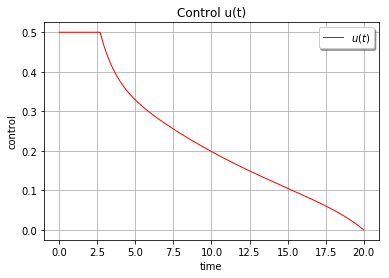

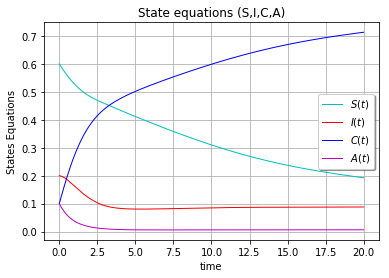

In [3]:
import numpy as np
from scipy.integrate import solve_bvp, simps,odeint, trapz 
import matplotlib.pyplot as plt


mi = 1.0 / 69.54; b = 2.1 * mi; beta = 1.6
etaC = 0.015; etaA = 1.3; fi = 1.0; ro = 0.1
alfa = 0.33; omega = 0.09; d = 1.0 ;deltaError = 0.001

def ode(t, y):
    S,I,C,A,Lambda1,Lambda2,Lambda3,Lambda4 = y

    # Differential equations for the state variables    
    vAux = 0.5 * beta * (I + etaC * C + etaA * A) * S * (Lambda1 - Lambda2)
    Umax = np.where(vAux < 0, 0, vAux)
    tmpU = np.where(Umax > 0.5,0.5,Umax)
    u = tmpU
    
    aux1 = (1 - u) * beta * (I + etaC * C + etaA * A) * S
    aux2 = d * A

    auxS1 = b * (1 - S) - aux1 + aux2 * S
    auxI1 = aux1 - (ro + fi + b - aux2) * I + alfa * A + omega * C
    auxC1 = fi * I - (omega + b - aux2) * C
    auxA1 = ro * I - (alfa + b + d - aux2) * A
    ########################################################
    # Differential equations for the co-state variables
    auxU = 1 - u
    aux1 = auxU * beta * (I + etaC * C + etaA * A)
    aux2 = d * A

    auxLambda11 = -1 + Lambda1 * (b + aux1 - aux2) - Lambda2 * aux1
    aux1 = auxU * beta * S
    auxLambda21 = 1 + Lambda1 * aux1 - Lambda2 * (aux1 - (ro + fi + b)+ aux2) - Lambda3 * fi - Lambda4 * ro

    aux1 = auxU * beta * etaC * S
    auxLambda31 = Lambda1 * aux1 - Lambda2 * (aux1 + omega) + Lambda3 * (omega + b - aux2)
    aux1 = auxU * beta * etaA * S
    auxLambda41 = Lambda1 * (aux1 + d * S) - Lambda2 * (aux1 + alfa + d * I) - Lambda3 * d * C + Lambda4 * (alfa + b + d - 2 * aux2)
    return [auxS1,auxI1,auxC1,auxA1,auxLambda11, auxLambda21, auxLambda31, auxLambda41] #return state  and co-state eqns

def bc(ya,yb): #boundary conition for S,I,C,A and p1,p2,p3,p4
    s0 =ya[0]-0.6; i0=ya[1]-0.2; c0=ya[2]-0.1; a0=ya[3]-0.1; p01= yb[4]; p02=yb[5]; p03=yb[6]; p04=yb[7]
    return [s0,i0,c0,a0,p01,p02,p03,p04]

# Initial guess for the solution
N = 201
xin = np.linspace(0, 20, N) #time or number of steps
yin = np.zeros((8,N))   # trivial guess

# solve the boundary value problem
sol = solve_bvp(ode, bc, xin, yin)
x = sol.x #steps or time
S1 = sol.y[0];I1 = sol.y[1];C1 = sol.y[2];A1 = sol.y[3]
p1 = sol.y[4];p2 = sol.y[5];p3 = sol.y[6];p4 = sol.y[7]

# Calculate u(t) from x,p
u =0.5 * beta * (I1 + etaC * C1 + etaA * A1) * S1 * (p1 - p2)
#Constraints on U(t)
u1 = np.where(u > 0.5, 0.5,u) #setting values above 2 to 2
u2 = np.where(u1 < 0, 0, u1) #setting values below 0 to 0
u3 = u2

# Calculate the cost
w =  (S1- I1 - u3**2)
J = simps(w,x=x) #compute the integral of the objective function
print('J=',J)

plt.figure(1)
plt.plot(x, u2,'-r',  LineWidth = 1, label='$u(t)$') # for the control, u
plt.xlabel('time')
plt.ylabel('control')
plt.grid(True)
plt.legend(framealpha=1, shadow=True)
plt.title('Control u(t)')
plt.show()

plt.figure(2)
plt.plot(x, S1,'-c',LineWidth = 1, label='$S(t)$') # for the state
plt.plot(x, I1,'-r',LineWidth = 1, label='$I(t)$') # for the state
plt.plot(x, C1,'-b',LineWidth = 1, label='$C(t)$') # for the state
plt.plot(x, A1,'-m',LineWidth = 1, label='$A(t)$') # for the state
plt.xlabel('time')
plt.ylabel('States Equations')
plt.grid(True)
plt.legend(framealpha=1, shadow=True)
plt.title('State equations (S,I,C,A)')
#plt.savefig('opt1.eps')
plt.show()
